In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
from model_settings import ms
ms.find_root(Path())
models_dir = os.path.join(ms.root,ms.trained_models)

import convsklearn.load_model as load
model = load(models_dir)
fitted = model['fitted']

0   2024-12-03 115353819604 inital cboe spx relative asian
1   2024-12-03 221708375538 inital cboe spx relative barrier


select model:  1


In [3]:
model['feature_set']

['days_to_maturity',
 'dividend_rate',
 'risk_free_rate',
 'theta',
 'kappa',
 'rho',
 'eta',
 'v0',
 'relative_spot',
 'relative_barrier',
 'relative_rebate',
 'w',
 'barrier_type_name']

In [4]:
dataset = model['dataset']

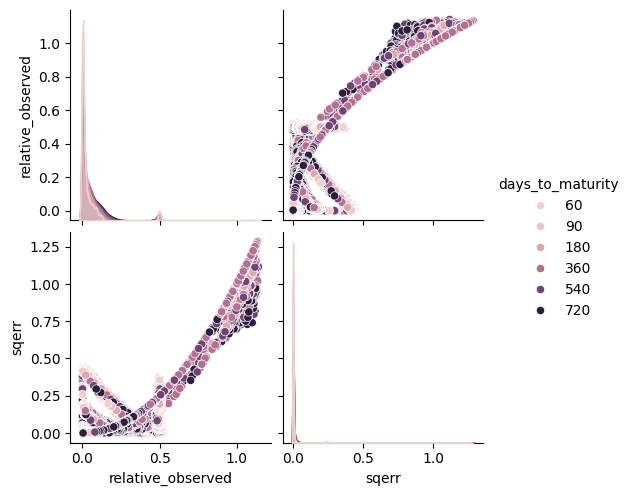

In [5]:
test = model['test_data']
test['sqerr'] = test['outofsample_error']**2
plot = sns.pairplot(test,vars=[model['target_name'],'sqerr'],hue='days_to_maturity')
plt.show()
plt.close()

In [6]:
dataset['relative_observed'].describe()

count    3.851820e+06
mean     4.952921e-02
std      9.857881e-02
min      0.000000e+00
25%      4.106998e-04
50%      1.464063e-02
75%      5.840337e-02
max      1.140490e+00
Name: relative_observed, dtype: float64

In [7]:
predicted = model['test_data']['outofsample_prediction']
predicted.describe()

count    3.584880e+06
mean     3.161365e-02
std      7.686906e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.802285e-02
max      1.105636e+00
Name: outofsample_prediction, dtype: float64

In [8]:
predicted[predicted>1].describe()

count    628.000000
mean       1.043547
std        0.019085
min        1.000548
25%        1.031590
50%        1.042063
75%        1.053294
max        1.105636
Name: outofsample_prediction, dtype: float64

In [9]:
fitted[1].__dict__

{'activation': 'relu',
 'solver': 'sgd',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.1,
 'power_t': 0.5,
 'max_iter': 500,
 'loss': 'squared_error',
 'hidden_layer_sizes': (10,),
 'shuffle': True,
 'random_state': 1312,
 'tol': 0.0001,
 'verbose': False,
 'warm_start': False,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'early_stopping': True,
 'validation_fraction': 0.1,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-08,
 'n_iter_no_change': 20,
 'max_fun': 15000,
 'n_features_in_': 17,
 'n_outputs_': 1,
 '_random_state': RandomState(MT19937) at 0x1DEF727A840,
 'n_iter_': 299,
 't_': 71833554,
 'n_layers_': 3,
 'out_activation_': 'identity',
 'coefs_': [array([[ 1.13612112e-01, -6.01021266e-02,  2.68542365e-02,
           1.68532300e-01, -9.15085170e-02, -3.03245090e-03,
          -3.71831087e-01,  1.22427633e-01,  2.58672793e-02,
           1.02457785e-01],
         [ 1.56199050e-02, -3.64221975e-02, -1.06502789e-02,
          